In [12]:
#load model

import gensim.downloader as api

model = api.load("word2vec-google-news-300")

In [13]:
#data preprocess
import pandas as pd
import re
from nltk.corpus import stopwords
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

DetectorFactory.seed = 0

#data_clean is our original data
data_clean_path = 'C:/Users/xiang/PycharmProjects/node2vec/pythonProject/data_clean.csv'
data_clean = pd.read_csv(data_clean_path)


extra_stopwords = {
    "ad", "episode", "podcast", "instagram", "podcasts", "dr", "youtube",
    "subscribe", "twitter", "episodes", "including", "alex", "links", "ll",
    "access", "sponsors", "ve", "don", "spotify", "facebook", "kelly", "john",
    "sean", "joe", "called", "host", "david", "website", "ben", "dive", "tom",
    "mike", "hosted", "channel", "times", "de", "ramsey", "tim", "list", "web",
    "chris", "click", "dan", "amazon", "ryan", "megyn", "follow", "exclusive", 
    "shapiro", "tiktok", "guided", "multitude", "intended", "siriusxm", "free", 
    "link", "visit", "discord"
}
stop_words = set(stopwords.words('english')).union(extra_stopwords)


def clean_text(text):
    if not isinstance(text, str):  
        return ""

    text = re.sub(r'[^\w\s]', '', text.lower())

    words = [word for word in text.split() if word not in stop_words]
    return " ".join(words)


data_clean['cleaned_description'] = data_clean['description'].fillna('').astype(str).apply(clean_text)


def is_spanish(text):

    try:
        language = detect(text)
        return language == 'es'  
    except LangDetectException:
        return False  


data_clean['is_spanish'] = data_clean['cleaned_description'].apply(is_spanish)
data_clean = data_clean[~data_clean['is_spanish']].drop(columns=['is_spanish'])


output_path = 'C:/Users/xiang/PycharmProjects/node2vec/pythonProject/processed_data_clean.csv'
data_clean.to_csv(output_path, index=False)




KeyboardInterrupt: 

In [3]:
#word embedding -> text embedding
import pandas as pd
import numpy as np
data = pd.read_csv('processed_data_clean.csv')

def get_sentence_vector(sentence, model):

    words = sentence.split()  
    word_vectors = [model[word] for word in words if word in model]
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)  


data['cleaned_description'] = data['cleaned_description'].fillna('').astype(str)
data['vector'] = data['cleaned_description'].apply(lambda x: get_sentence_vector(x, model))

vector_columns = [f'vector_{i}' for i in range(model.vector_size)]
vector_data = pd.DataFrame(data['vector'].tolist(), columns=vector_columns)

output_data = pd.concat([data[['name', 'description','cleaned_description']], vector_data], axis=1)


output_path = 'C:/Users/xiang/PycharmProjects/node2vec/pythonProject/description_vectors_processed.csv'
output_data.to_csv(output_path, index=False)
print(f"处理后的数据已保存到 {output_path}")


处理后的数据已保存到 C:/Users/xiang/PycharmProjects/node2vec/pythonProject/description_vectors_processed.csv


In [54]:
#sample vector derivation 1
finance_paragraphs = [
    "Stock market closed record high, gains technology sector.",
    "Investors watching Federal Reserve's decision interest rate changes.",
    "Company reported better-than-expected quarterly earnings, boosting share price 5%.",
    "Sharp decline oil prices sent energy stocks tumbling trading session.",
    "S&P 500 10% year-to-date, reflecting strong corporate earnings economic recovery.",
    "Diversification key principle reducing risk investment portfolio.",
    "Cryptocurrency prices surged major payment company announced support Bitcoin.",
    "Bond market saw increased demand investors sought safety amid economic uncertainty.",
    "Day trading requires deep understanding market trends quick decision-making skills.",
    "Dow Jones Industrial Average rose 200 points, gains industrial healthcare stocks.",
    "Central bank hinted tapering bond-buying program, sending shockwaves markets.",
    "Major hedge fund reported significant losses risky bets emerging markets.",
    "Initial public offering (IPO) tech startup oversubscribed institutional investors.",
    "Yield curve inverted briefly, sparking fears impending economic recession.",
    "Real estate market booming, property prices reaching all-time highs.",
    "Value investing focuses finding stocks undervalued relative intrinsic worth.",
    "Rise inflation prompted investors shift portfolios commodities real assets.",
    "Sudden market correction wiped billions dollars market capitalization hours.",
    "NASDAQ Composite gained 1.5% investors piled growth stocks tech shares.",
    "Concept dollar-cost averaging helps investors mitigate risks market volatility.",
    "Blue-chip stock typically well-established company history stable growth dividends.",
    "Gold price rose investors sought safe haven amid geopolitical tensions.",
    "Banking sector outperformed broader market series strong earnings reports.",
    "Technical analysis chart revealed bullish breakout pattern stock's price movement.",
    "Stock split increases company's share liquidity attracts retail investors.",
    "Foreign exchange market, forex, largest financial market world trading volume.",
    "Passive investing involves tracking index, S&P 500, achieve market returns.",
    "Bear market defined prolonged period falling stock prices, typically exceeding 20%.",
    "Short selling allows investors profit decline price stock asset.",
    "High P/E ratio indicate stock overvalued, relative earnings potential.",
    "Hedge funds use complex strategies, derivatives leverage, generate returns.",
    "Rise ESG (Environmental, Social, Governance) investing reshaped financial industry.",
    "Bond yields rising steadily, reflecting growing confidence economic recovery.",
    "Price-to-book ratio fundamental metric evaluating company's valuation.",
    "Cryptocurrency market remains highly volatile, prices fluctuating double digits daily.",
    "Investors eyeing opportunities emerging markets, despite associated higher risks.",
    "Earnings per share (EPS) critical measure company's profitability.",
    "Asset bubble occurs price asset rises far above intrinsic value.",
    "Stock market's performance barometer economy's health.",
    "Quantitative easing central banks injected significant liquidity financial system.",
    "ETF (Exchange-Traded Fund) offers investors diversified portfolio lower cost.",
    "Yield 10-year Treasury notes hit highest level years, impacting borrowing costs.",
    "Growth fintech startups disrupted traditional banking financial services.",
    "IPO market flurry activity, tech firms leading charge.",
    "Earnings season provides critical insights financial health publicly traded companies.",
    "Concept portfolio rebalancing helps maintain desired risk-return profile time.",
    "Global financial markets reacted strongly trade agreement nations.",
    "Price crude oil surged supply disruption Middle East.",
    "Mutual funds pool money multiple investors invest diversified portfolio assets.",
    "Federal Reserve's hawkish stance inflation spooked investors bond market.",
    "Technical indicators RSI (Relative Strength Index) help traders identify overbought oversold conditions.",
    "Consumer price index (CPI) key indicator inflation trends economy.",
    "Growth stocks trade higher valuations future earnings potential.",
    "Market capitalization company crossed $1 trillion, largest firms globally.",
    "Options trading allows investors hedge risk speculate future price movements.",
    "Commodities gold silver hedge inflation.",
    "Dividend yield represents annual dividend income relative stock price.",
    "Quantitative analysis uses mathematical models algorithms trading strategies.",
    "Market sentiment turned bullish unemployment rate fell lowest level decades.",
    "Central bank's dovish tone monetary policy supported gains equity markets.",
    "Blockchain technology transforming financial transactions conducted recorded.",
    "Leverage ratio indicates level debt company uses finance operations.",
    "Sharp increase interest rates dampened investor enthusiasm high-growth sectors.",
    "Stock buybacks signal company believes shares undervalued.",
    "Global macro strategies focus exploiting economic geopolitical trends financial gain.",
    "Concept risk-adjusted returns helps investors evaluate performance relative risk taken.",
    "Earnings surprise led massive rally company's stock price.",
    "Put option provides right sell stock predetermined price specific period.",
    "VIX index, 'fear gauge,' measures market expectations future volatility.",
    "Bullish engulfing pattern candlestick chart suggested potential trend reversal.",
    "Increasing popularity robo-advisors democratized access financial planning services.",
    "Company's strong cash flow allowed weather economic downturns effectively.",
    "Bid-ask spread narrowed trading volume increased, improving market liquidity.",
    "Real estate investment trusts (REITs) offer exposure property market greater liquidity.",
    "Momentum investing focuses buying stocks shown strong recent performance.",
    "Inverted yield curve historically reliable predictor economic recessions.",
    "Sharp decline cryptocurrency prices wiped billions investor wealth overnight.",
    "Factor investing targets specific drivers returns, value, growth, momentum.",
    "Market corrections normal events create buying opportunities long-term investors.",
    "Rise decentralized finance (DeFi) challenging traditional financial intermediaries.",
    "Stock indices FTSE 100 Nikkei 225 reflect performance global markets.",
    "Tech sector outperformed industries, driven strong demand innovation.",
    "Liquidity risk refers potential difficulty selling asset impacting price.",
    "Sustainable investing aligns financial goals environmental social values.",
    "Currency hedging strategies protect adverse movements exchange rates.",
    "Record-breaking fundraising private equity space underscores investor confidence.",
    "Trailing stop-loss order helps investors lock profits limiting downside risk.",
    "Candlestick chart provides visual representation price movements specific period.",
    "Financial sector's performance closely tied interest rate movements economic growth.",
    "Leveraged ETFs magnify returns increase potential significant losses.",
    "Compound annual growth rate (CAGR) useful measure investment performance time."
]

def calculate_mean_vector(paragraphs, model):

    all_vectors = []
    for paragraph in paragraphs:
        words = paragraph.lower().split()
        valid_vectors = [model[word] for word in words if word in model]
        if valid_vectors:
            paragraph_vector = np.mean(valid_vectors, axis=0)
            all_vectors.append(paragraph_vector)
    if not all_vectors:
        raise ValueError("No effective vectors were calculated!")
    return np.mean(all_vectors, axis=0)

finance_vector = calculate_mean_vector(finance_paragraphs, model)

print(finance_vector)
np.save('C:/Users/xiang/PycharmProjects/node2vec/pythonProject/finance_vector.npy', finance_vector)

[-1.31906429e-02  3.13099436e-02 -3.82426269e-02  4.91270907e-02
 -2.66126227e-02 -7.61564150e-02  1.23772006e-02 -9.11313072e-02
  1.77229151e-01  5.83834685e-02 -9.64406431e-02 -3.93788703e-02
  3.68808061e-02  8.78939927e-02 -1.38598174e-01  6.02607206e-02
 -3.62161286e-02  4.44137305e-02  2.45291460e-02 -8.67611840e-02
 -4.46947152e-03  3.11297402e-02 -3.56919281e-02  1.48145854e-02
  5.71623631e-02 -5.06263226e-03 -4.33603004e-02  1.07285634e-01
  1.44790402e-02  8.07053503e-03  3.34706679e-02 -6.96890280e-02
 -6.92341989e-03 -5.52243963e-02 -5.59557416e-03 -2.37553543e-03
  3.35449055e-02 -3.83024961e-02  6.98076412e-02  6.60359636e-02
  8.80382955e-02 -1.02471130e-03  1.10670224e-01 -6.05682097e-03
 -7.50392303e-02 -8.51235613e-02  4.68038535e-03  5.89917190e-02
  2.03033704e-02 -1.25090713e-02  1.14307791e-01 -2.80808359e-02
 -1.03857942e-01  2.52628271e-02  1.33315288e-02  6.53844327e-02
 -4.60155308e-02 -3.26597728e-02  8.56606439e-02 -8.07903856e-02
 -4.36115898e-02  3.13593

In [56]:
#sample vector derivation 2
thrilling_paragraphs = [
    "Dark figure emerged shadows, footsteps echoing empty hallway.",
    "Heart raced sound creaking floorboard silence.",
    "Flash lightning illuminated silhouette standing window.",
    "Phone rang midnight, eerie voice whispered, 'I'm watching.'",
    "Ancient diary revealed chilling secret sealed centuries.",
    "Door creaked open slowly, revealing empty, dimly lit room.",
    "Blood-curdling scream shattered stillness forest.",
    "Rustling leaves outside window sent shiver spine.",
    "Flickering candlelight cast unsettling shadows across room.",
    "Wind howled, slamming door shut unseen force.",
    "Mysterious stranger handed envelope marked 'Do not open.'",
    "Old mirror reflected figure standing behind, nobody there.",
    "Whispers filled air, though room appeared empty.",
    "Abandoned house felt alive, every creak groan amplifying dread.",
    "Clocks stopped simultaneously, plunging house eerie silence.",
    "Fog rolled thick, obscuring view approaching figure.",
    "Shadow moved corner eye, disappearing blink.",
    "Locked box found attic held sinister contents.",
    "Voice recorder played back sound breathing silence.",
    "Portrait's eyes seemed follow every movement room.",
    "Unearthly glow emanated ancient artifact found cave.",
    "Cabin deep woods appeared untouched, door slightly ajar.",
    "Cryptic message carved tree read, 'Leave before dark.'",
    "Lights flickered, plunging room darkness momentarily.",
    "Cold hand touched shoulder, nobody standing behind.",
    "Rain pounded windows, muffling distant cries.",
    "Time stopped clock struck midnight, shadows deepened.",
    "Unmarked van idled street, driver staring intently house.",
    "Trail blood led thick underbrush forest.",
    "Heavy breathing phone call ended ominous silence.",
    "Old rocking chair moved rhythmically empty porch.",
    "Forgotten well backyard emitted strange noises night.",
    "Moonlight revealed figure standing still cemetery.",
    "Unknown number sent cryptic message, 'You can't hide.'",
    "Trapdoor basement revealed passage leading darkness.",
    "Chilling laughter echoed abandoned hospital corridors.",
    "Grave marker bore chilling inscription, name missing.",
    "Manuscript detailed events mirror reality unfolding.",
    "Knocking sound front door revealed nobody outside.",
    "Shadows danced walls, though source light absent.",
    "Elevator descended basement floor nobody pressed button.",
    "Claw marks appeared walls overnight, unexplained origin.",
    "Distant hum machinery ceased suddenly, plunging silence.",
    "Muddy footprints led front door, disappearing inside.",
    "Doll's eyes seemed blink light shifted.",
    "Old lighthouse beam illuminated figure standing cliffs.",
    "Weathered photograph depicted person identical stranger arrived town.",
    "Heavy chains rattled attic, room empty arrival.",
    "Creaking staircase gave way weight unseen presence.",
    "Small box labeled 'Danger' sat untouched decades.",
    "Snowstorm stranded travelers remote, eerie cabin.",
    "Shattered glass lay floor, window locked inside.",
    "Lantern flickered, revealing carved symbols walls cave.",
    "Letter arrived postmarked future date.",
    "Crypt door stood slightly ajar, revealing darkness beyond.",
    "Heavy fog obscured figure dragging heavy object woods.",
    "Voice whispered warning, source could not identified.",
    "Mirror cracked spontaneous, reflecting distorted image.",
    "Unearthed mask seemed pulse touch.",
    "Chilling wind blew extinguishing candle darkness.",
    "Midnight bell tower tolled thirteen times.",
    "Veil mist lifted moment, revealing empty boat drifting.",
    "Hollow tree trunk contained journal ending 'Don't follow me.'",
    "Painting depicted figure never part original artwork.",
    "Door handle turned itself, room beyond locked.",
    "Birdsong ceased suddenly, replaced oppressive silence.",
    "Flickering streetlamp revealed empty swing moving windless night.",
    "Thunderclap revealed face pressed window vanished moment.",
    "Music box played haunting tune opened.",
    "Faint scratch marks covered inside closet door.",
    "Final page book missing, title 'How story ends.'",
    "Figure appeared security footage, room empty inspection.",
    "Footsteps echoed staircase, source never found.",
    "Familiar voice called name, nobody present.",
    "Rusty key found beneath floorboards fit unseen lock.",
    "Old clock struck thirteen, hands moving erratically.",
    "Shadows walls elongated stretched unnatural shapes.",
    "Glass shattered room devoid occupants.",
    "Abandoned amusement park came life flickering lights.",
    "Journal entry read, 'Don't let them see fear.'",
    "Distant howl broke silence mountain night.",
    "Old radio static broke cryptic message faint voice.",
    "Chains broke abandoned prison, gates stood open.",
    "Candle flame turned blue, flickered violently extinguished.",
    "Statue garden seemed shift positions nightly.",
    "Air grew icy footsteps approached unseen entity.",
    "Chilling scream echoed mountains, fading hollow silence.",
    "Cryptic message mirror read backwards, 'Get out now.'",
    "Photograph showed figure room appeared alone.",
    "Basement light revealed dusty footprints heading corner.",
    "Unfamiliar reflection stared back, unblinking.",
    "Ancient book revealed chilling premonitions future.",
    "Unearthly howl pierced storm, freezing group place.",
    "Blood-red moon hung sky, casting eerie glow.",
    "Ceiling cracked revealing void beyond comprehension.",
    "Creaking old gate signaled beginning dreadful encounter."
]


def calculate_mean_vector(paragraphs, model):
    all_vectors = []
    for paragraph in paragraphs:
        words = paragraph.lower().split()
        valid_vectors = [model[word] for word in words if word in model]
        if valid_vectors:
            paragraph_vector = np.mean(valid_vectors, axis=0)
            all_vectors.append(paragraph_vector)
    if not all_vectors:
        raise ValueError("No effective vectors were calculated")
    return np.mean(all_vectors, axis=0)

thrilling_vector = calculate_mean_vector(thrilling_paragraphs, model)

thrilling_vector_path = 'C:/Users/xiang/PycharmProjects/node2vec/pythonProject/thrilling_vector.npy'
np.save(thrilling_vector_path, thrilling_vector)



In [57]:
#sample vector derivation 3
science_paragraphs = [
    "Earth revolves Sun, completing orbit 365.25 days.",
    "Photosynthesis process green plants convert sunlight energy.",
    "Theory relativity transformed understanding space time.",
    "DNA molecule carries genetic information living organisms.",
    "Black holes regions spacetime gravity strong, nothing escape.",
    "Water cycle describes continuous movement water Earth surface.",
    "Human brain consists billions neurons connected synapses.",
    "Gravity force attracts two bodies toward.",
    "Speed light vacuum approximately 299,792 kilometers second.",
    "Big Bang theory describes origin universe approximately 13.8 billion years ago.",
    "Periodic table organizes elements atomic number properties.",
    "Climate change refers long-term changes global regional climate patterns.",
    "Evolution explains diversity life gradual changes time.",
    "Astronomy study celestial objects stars, planets, galaxies.",
    "Second law thermodynamics states entropy closed system tends increase.",
    "Quantum mechanics governs behavior particles atomic subatomic levels.",
    "Antibiotics medicines kill slow growth bacteria.",
    "Vaccines help immune system recognize fight pathogens.",
    "Hubble Space Telescope provided stunning images distant galaxies.",
    "Cell basic unit life living organisms.",
    "Milky Way galaxy contains solar system.",
    "Genetic engineering allows scientists modify DNA organisms.",
    "Renewable energy sources include solar, wind, hydroelectric power.",
    "Carbon cycle essential maintaining life Earth.",
    "Ozone layer protects life blocking harmful ultraviolet radiation Sun.",
    "Tectonic plates massive slabs Earth's crust move interact.",
    "Fusion powers Sun combining hydrogen atoms helium.",
    "Neutron star remnant massive star supernova.",
    "Artificial intelligence mimics human intelligence machines.",
    "Machine learning subset AI enables computers learn data.",
    "Conservation energy states energy created destroyed.",
    "Fibonacci sequence appears natural patterns structures.",
    "CRISPR revolutionary tool editing genomes.",
    "Dark matter dark energy make universe mass energy.",
    "Electricity flow electrons conductor.",
    "Renewable energy reduces greenhouse gas emissions reliance fossil fuels.",
    "Plate tectonics explains earthquakes, volcanic activity, mountain formation.",
    "Sound travels waves medium air, water, solids.",
    "Radio waves type electromagnetic radiation used communication.",
    "Nanotechnology involves manipulating matter atomic molecular scale.",
    "Meteorology study atmosphere weather patterns.",
    "Human genome project mapped genes human DNA.",
    "Biodiversity ensures ecosystem stability resilience.",
    "Richter scale measures magnitude earthquakes.",
    "Algae play crucial role producing oxygen supporting aquatic ecosystems.",
    "Doppler effect explains change frequency waves relative observer.",
    "Hurricanes powerful tropical storms driven warm ocean waters.",
    "Carbon dioxide greenhouse gas contributing global warming.",
    "Einstein's equation E=mc^2 relates energy, mass, speed light.",
    "Process natural selection drives evolution favoring advantageous traits.",
    "Three states matter solid, liquid, gas.",
    "Electromagnetic spectrum includes radio waves, microwaves, infrared, visible light, ultraviolet, X-rays, gamma rays.",
    "Photosynthesis produces oxygen byproduct, essential life Earth.",
    "pH scale measures acidity alkalinity substance.",
    "Plate tectonics shape Earth's surface processes subduction seafloor spreading.",
    "Greenhouse effect traps heat Earth's atmosphere, regulating temperature.",
    "Aurora borealis caused charged particles colliding Earth's magnetic field.",
    "Solar eclipse occurs Moon passes Earth Sun.",
    "Periodic table's rows represent periods, columns represent groups elements.",
    "Krebs cycle key metabolic pathway generates energy cells.",
    "Nitrogen cycle essential converting nitrogen usable forms organisms.",
    "Laws motion, defined Isaac Newton, explain objects move interact.",
    "Diffusion process molecules move area high concentration low concentration.",
    "Andromeda galaxy closest spiral galaxy Milky Way.",
    "Structure DNA double helix, first described Watson Crick.",
    "Bioluminescence allows organisms produce light chemical reactions.",
    "Three domains life Bacteria, Archaea, Eukarya.",
    "Photosynthesis occurs chloroplasts plant cells.",
    "Process mitosis allows cells divide reproduce.",
    "Mars often called Red Planet iron oxide-rich surface.",
    "Telescopes revolutionized understanding universe.",
    "Water molecule, H2O, consists two hydrogen atoms oxygen.",
    "Human body contains approximately 60% water weight.",
    "Earth's core primarily composed iron nickel.",
    "Process condensation changes water vapor liquid water.",
    "Satellites orbit Earth, providing valuable data communication research.",
    "Volcanoes release magma, gases, ash Earth's crust.",
    "Equator divides Earth Northern Southern Hemispheres.",
    "Moon's gravitational pull causes tides Earth.",
    "Concept gravity first described mathematically Sir Isaac Newton.",
    "Comet celestial object composed ice, rock, dust.",
    "Molecules smallest units compounds retain properties.",
    "Erosion shapes Earth's surface wearing rock soil.",
    "Sun closest star Earth source energy.",
    "Geothermal energy derived heat Earth's interior.",
    "Carbon building block life, forming basis organic molecules.",
    "Chlorophyll pigment gives plants green color enables photosynthesis.",
    "Lava molten rock emerges volcano eruption.",
    "Fossils provide evidence past life history Earth.",
    "Human skeleton consists 206 bones provide structure support.",
    "Atoms basic units matter, consisting protons, neutrons, electrons.",
    "Rainbows formed light refracted, reflected, dispersed water droplets."
]


def calculate_mean_vector(paragraphs, model):
    all_vectors = []
    for paragraph in paragraphs:
        words = paragraph.lower().split()
        valid_vectors = [model[word] for word in words if word in model]
        if valid_vectors:
            paragraph_vector = np.mean(valid_vectors, axis=0)
            all_vectors.append(paragraph_vector)
    if not all_vectors:
        raise ValueError("No effective vector were calculated")
    return np.mean(all_vectors, axis=0)

science_vector = calculate_mean_vector(science_paragraphs, model)

# 保存科普类向量
science_vector_path = 'C:/Users/xiang/PycharmProjects/node2vec/pythonProject/science_vector.npy'
np.save(science_vector_path, science_vector)

In [58]:
#score calculation
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

description_vectors_path = 'C:/Users/xiang/PycharmProjects/node2vec/pythonProject/description_vectors_processed.csv'
vectors_df = pd.read_csv(description_vectors_path)

vector_columns = [col for col in vectors_df.columns if col.startswith('vector_')]
vectors = vectors_df[vector_columns].values

science_vector_path = 'C:/Users/xiang/PycharmProjects/node2vec/pythonProject/science_vector.npy'
finance_vector_path = 'C:/Users/xiang/PycharmProjects/node2vec/pythonProject/finance_vector.npy'
thrilling_vector_path = 'C:/Users/xiang/PycharmProjects/node2vec/pythonProject/thrilling_vector.npy'

science_vector = np.load(science_vector_path)
finance_vector = np.load(finance_vector_path)
thrilling_vector = np.load(thrilling_vector_path)

similarity_science = cosine_similarity(vectors, science_vector.reshape(1, -1)).flatten()
similarity_finance = cosine_similarity(vectors, finance_vector.reshape(1, -1)).flatten()
similarity_thrilling = cosine_similarity(vectors, thrilling_vector.reshape(1, -1)).flatten()

vectors_df['similarity_science'] = similarity_science
vectors_df['similarity_finance'] = similarity_finance
vectors_df['similarity_thrilling'] = similarity_thrilling

output_path = 'C:/Users/xiang/PycharmProjects/node2vec/pythonProject/similarity_scores.csv'
vectors_df[['name', 'description', 'similarity_science', 'similarity_finance', 'similarity_thrilling']].to_csv(output_path, index=False)



In [72]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

description_vectors_path = 'C:/Users/xiang/PycharmProjects/node2vec/pythonProject/description_vectors_processed.csv'
vectors_df = pd.read_csv(description_vectors_path)

vector_columns = [col for col in vectors_df.columns if col.startswith('vector_')]
vectors = vectors_df[vector_columns].values

science_vector_path = 'C:/Users/xiang/PycharmProjects/node2vec/pythonProject/science_vector.npy'
finance_vector_path = 'C:/Users/xiang/PycharmProjects/node2vec/pythonProject/finance_vector.npy'
thrilling_vector_path = 'C:/Users/xiang/PycharmProjects/node2vec/pythonProject/thrilling_vector.npy'

science_vector = np.load(science_vector_path)
finance_vector = np.load(finance_vector_path)
thrilling_vector = np.load(thrilling_vector_path)

similarity_science = cosine_similarity(vectors, science_vector.reshape(1, -1)).flatten()
similarity_finance = cosine_similarity(vectors, finance_vector.reshape(1, -1)).flatten()
similarity_thrilling = cosine_similarity(vectors, thrilling_vector.reshape(1, -1)).flatten()

vectors_df['similarity_science'] = similarity_science
vectors_df['similarity_finance'] = similarity_finance
vectors_df['similarity_thrilling'] = similarity_thrilling

output_path = 'C:/Users/xiang/PycharmProjects/node2vec/pythonProject/new_similarity_scores.csv'
vectors_df[['name', 'cleaned_description', 'similarity_science', 'similarity_finance', 'similarity_thrilling']].to_csv(output_path, index=False)



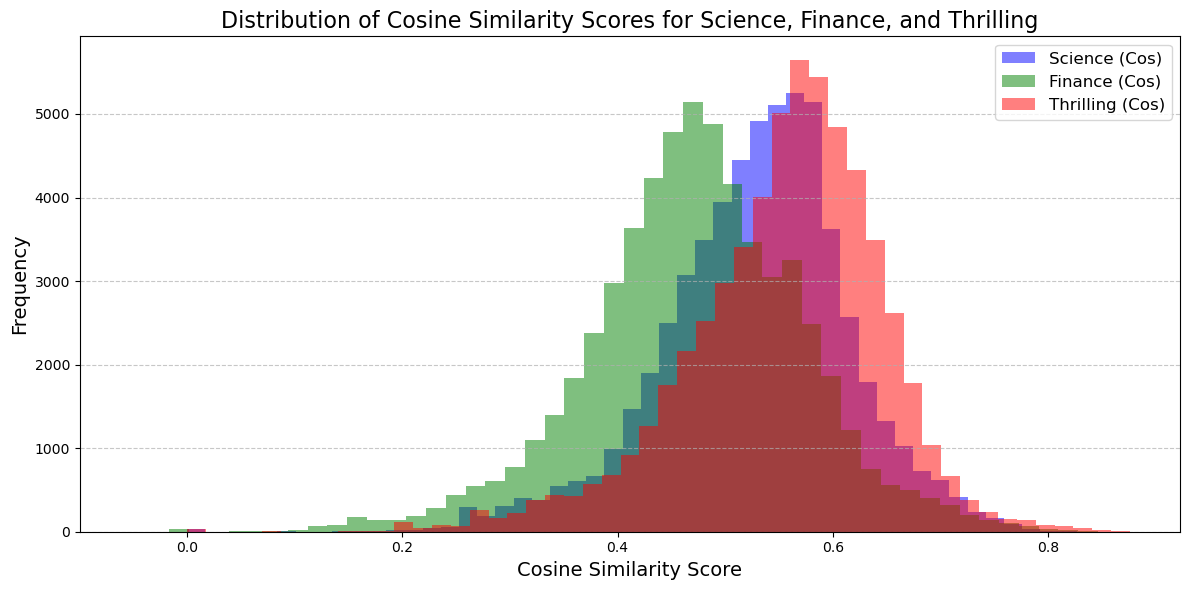

In [59]:
#visualize score distribution
import matplotlib.pyplot as plt
import pandas as pd

file_path = 'C:/Users/xiang/PycharmProjects/node2vec/pythonProject/similarity_scores.csv'
scores_df = pd.read_csv(file_path)

plt.figure(figsize=(12, 6))
plt.hist(scores_df['similarity_science'], bins=50, alpha=0.5, label='Science (Cos)', color='blue')
plt.hist(scores_df['similarity_finance'], bins=50, alpha=0.5, label='Finance (Cos)', color='green')
plt.hist(scores_df['similarity_thrilling'], bins=50, alpha=0.5, label='Thrilling (Cos)', color='red')

plt.title('Distribution of Cosine Similarity Scores for Science, Finance, and Thrilling', fontsize=16)
plt.xlabel('Cosine Similarity Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



In [73]:
import pandas as pd
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


file_path = 'C:/Users/xiang/PycharmProjects/node2vec/pythonProject/new_similarity_scores.csv'
scores_df = pd.read_csv(file_path)

def boxcox_transform_and_normalize(data, column):


    values = data[column].clip(lower=1e-6)  

    transformed, lambda_value = boxcox(values)
    print(f"Column: {column}, Lambda (λ): {lambda_value:.4f}")  

    scaler = MinMaxScaler(feature_range=(0, 1))
    normalized = scaler.fit_transform(transformed.reshape(-1, 1)).flatten()
    return normalized


columns_to_transform = ['similarity_science', 'similarity_finance', 'similarity_thrilling']
for col in columns_to_transform:
    scores_df[f'normalized_{col}'] = boxcox_transform_and_normalize(scores_df, col)


output_path = 'C:/Users/xiang/PycharmProjects/node2vec/pythonProject/new_normalized_similarity_scores.csv'
scores_df.to_csv(output_path, index=False)




Column: similarity_science, Lambda (λ): 1.6699
Column: similarity_finance, Lambda (λ): 1.2400
Column: similarity_thrilling, Lambda (λ): 1.9440


Column: similarity_science, Lambda (λ): 1.6699
Column: similarity_finance, Lambda (λ): 1.2400
Column: similarity_thrilling, Lambda (λ): 1.9440


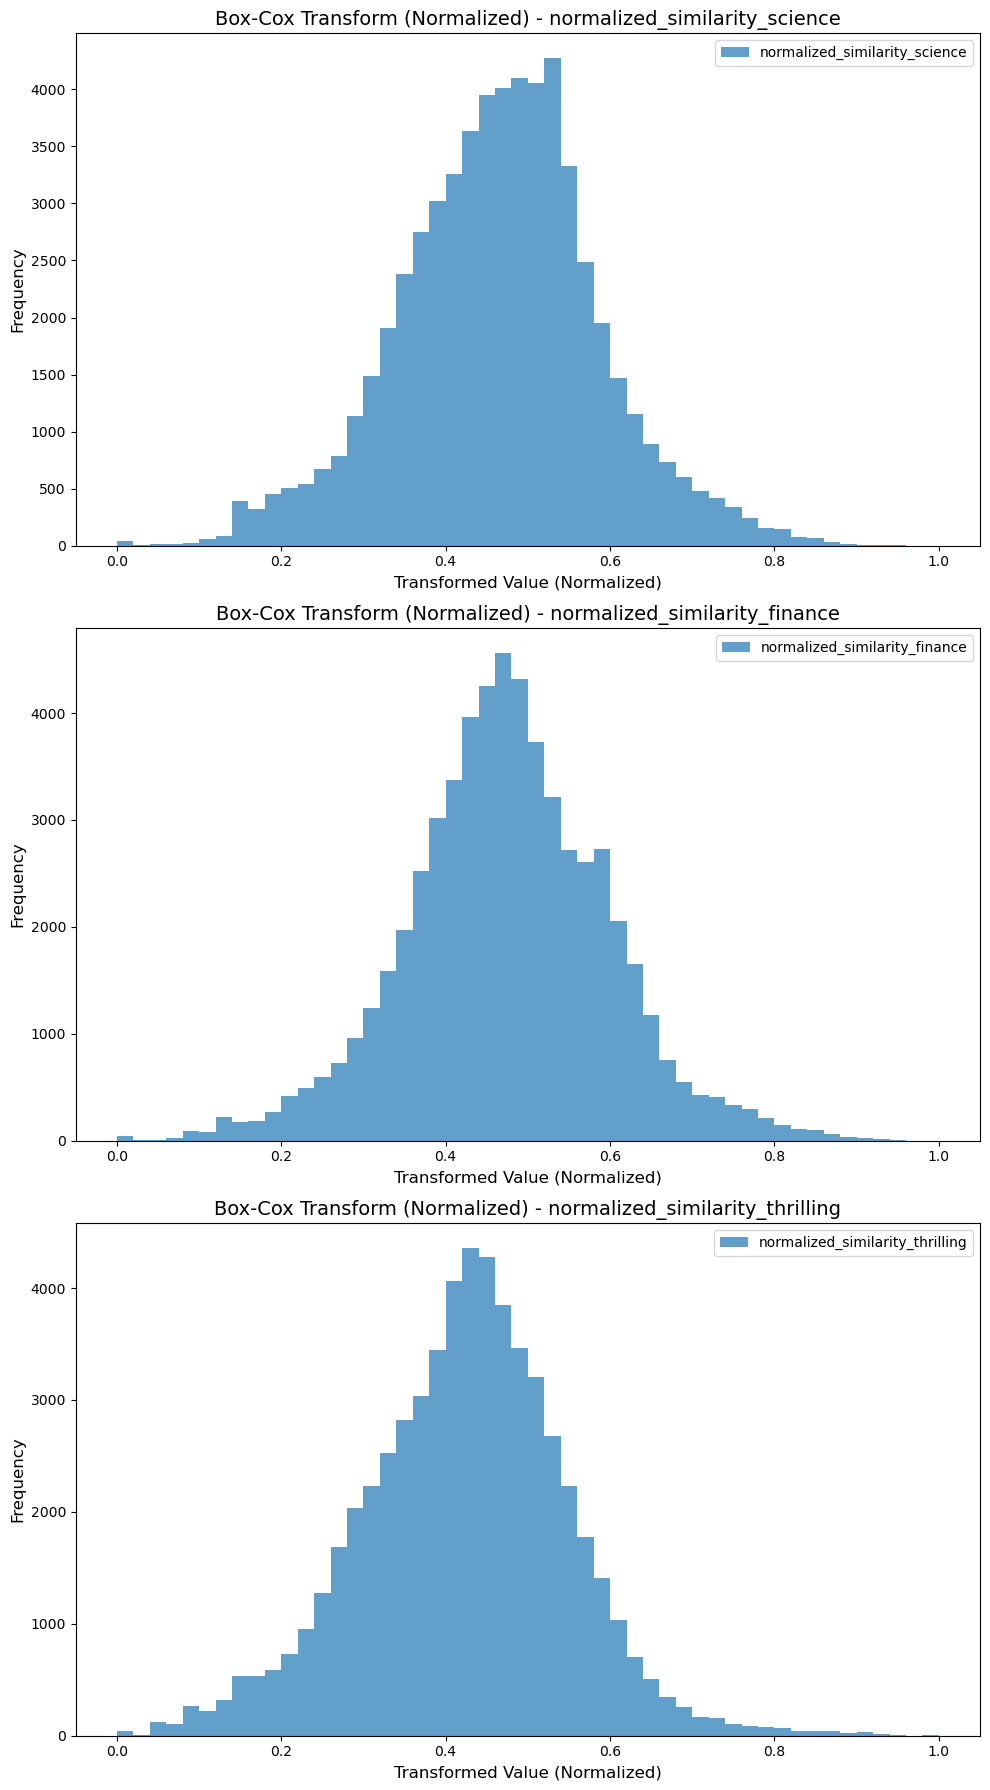

In [70]:
#score adjustment: Box-Cox transformation and visualization

import pandas as pd
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


file_path = 'C:/Users/xiang/PycharmProjects/node2vec/pythonProject/similarity_scores.csv'
scores_df = pd.read_csv(file_path)

def boxcox_transform_and_normalize(data, column):


    values = data[column].clip(lower=1e-6)  

    transformed, lambda_value = boxcox(values)
    print(f"Column: {column}, Lambda (λ): {lambda_value:.4f}")  

    scaler = MinMaxScaler(feature_range=(0, 1))
    normalized = scaler.fit_transform(transformed.reshape(-1, 1)).flatten()
    return normalized


columns_to_transform = ['similarity_science', 'similarity_finance', 'similarity_thrilling']
for col in columns_to_transform:
    scores_df[f'normalized_{col}'] = boxcox_transform_and_normalize(scores_df, col)


output_path = 'C:/Users/xiang/PycharmProjects/node2vec/pythonProject/normalized_similarity_scores.csv'
scores_df.to_csv(output_path, index=False)



def plot_transformed_distribution(data, column, ax):

    normalized = data[column]
    ax.hist(normalized, bins=50, alpha=0.7, label=column)
    ax.set_title(f"Box-Cox Transform (Normalized) - {column}", fontsize=14)
    ax.set_xlabel("Transformed Value (Normalized)", fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)
    ax.legend()

fig, axes = plt.subplots(3, 1, figsize=(10, 18))
normalized_columns = [f'normalized_{col}' for col in columns_to_transform]

for col, ax in zip(normalized_columns, axes):
    plot_transformed_distribution(scores_df, col, ax)

plt.tight_layout()
plt.show()



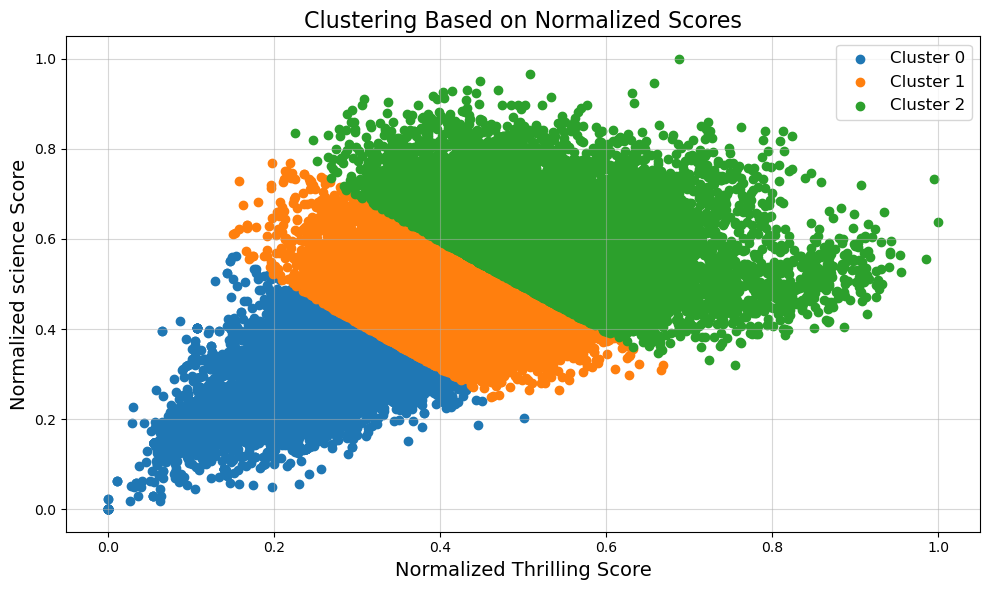

In [66]:
#Kmeans clustering
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


file_path = 'C:/Users/xiang/PycharmProjects/node2vec/pythonProject/normalized_similarity_scores.csv'
scores_df = pd.read_csv(file_path)

features = scores_df[['normalized_similarity_thrilling', 'normalized_similarity_science']].values

# 3. 定义聚类数量
num_clusters = 3  # 可以根据需求调整
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
scores_df['cluster'] = kmeans.fit_predict(features)

# 4. 可视化聚类结果
plt.figure(figsize=(10, 6))
for cluster_id in range(num_clusters):
    cluster_data = scores_df[scores_df['cluster'] == cluster_id]
    plt.scatter(
        cluster_data['normalized_similarity_thrilling'],
        cluster_data['normalized_similarity_science'],
        label=f"Cluster {cluster_id}"
    )

plt.title("Clustering Based on Normalized Scores", fontsize=16)
plt.xlabel("Normalized Thrilling Score", fontsize=14)
plt.ylabel("Normalized science Score", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()

# 5. 显示聚类图
plt.show()




In [62]:
#Example: show samples with the highest thrilling score.
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

description_vectors_path = 'C:/Users/xiang/PycharmProjects/node2vec/pythonProject/description_vectors_processed.csv'
vectors_df = pd.read_csv(description_vectors_path)

vector_columns = [col for col in vectors_df.columns if col.startswith('vector_')]
vectors = vectors_df[vector_columns].values


finance_vector_path = 'C:/Users/xiang/PycharmProjects/node2vec/pythonProject/finance_vector.npy'
finance_vector = np.load(finance_vector_path)

similarities = cosine_similarity(vectors, finance_vector.reshape(1, -1)).flatten()


top_indices = similarities.argsort()[::-1][:10]  
top_samples = vectors_df.iloc[top_indices][['name', 'description']].copy()
top_samples['similarity'] = similarities[top_indices]


output_path = 'C:/Users/xiang/PycharmProjects/node2vec/pythonProject/top_10_finance_similarities.csv'
top_samples.to_csv(output_path, index=False)



In [63]:
cosine_similarity(thrilling_vector.reshape(1, -1), finance_vector.reshape(1, -1)).flatten()

array([0.41896522], dtype=float32)

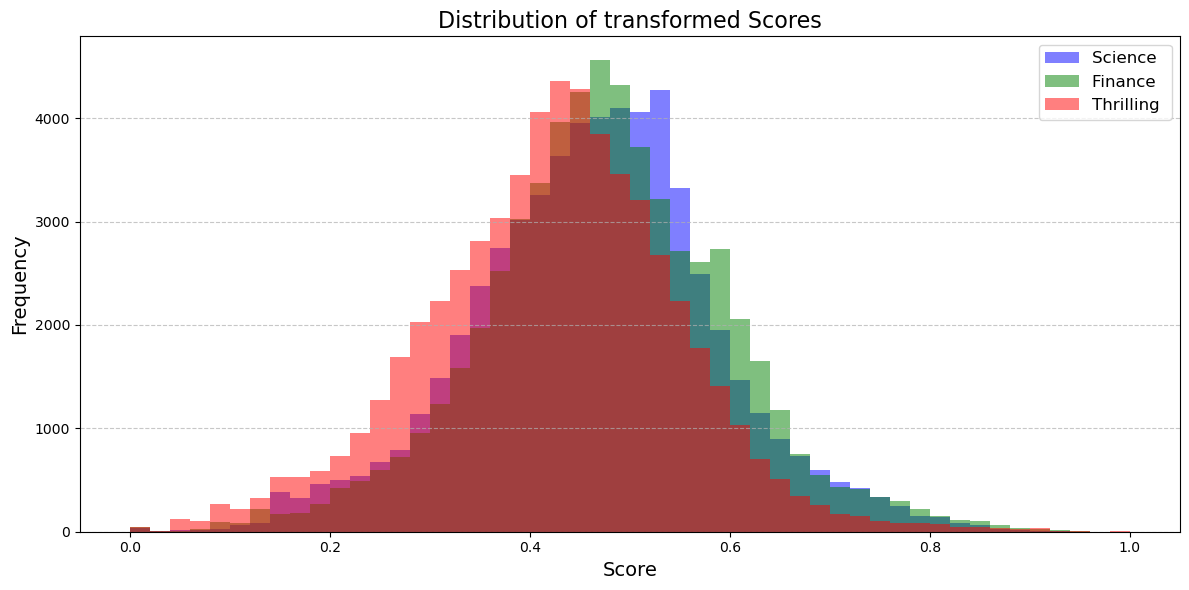

In [68]:
import matplotlib.pyplot as plt

# 1. 提取归一化后的分数
science_scores = scores_df['normalized_similarity_science']
touching_scores = scores_df['normalized_similarity_finance']
thrilling_scores = scores_df['normalized_similarity_thrilling']

# 2. 绘制分布柱状图
plt.figure(figsize=(12, 6))
plt.hist(science_scores, bins=50, alpha=0.5, label='Science ', color='blue')
plt.hist(touching_scores, bins=50, alpha=0.5, label='Finance ', color='green')
plt.hist(thrilling_scores, bins=50, alpha=0.5, label='Thrilling ', color='red')

# 3. 添加标题和标签
plt.title('Distribution of transformed Scores', fontsize=16)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 4. 显示图形
plt.tight_layout()
plt.show()

In [71]:
import pandas as pd
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler

# 1. 加载数据
file_path = 'C:/Users/xiang/PycharmProjects/node2vec/pythonProject/similarity_scores.csv'
scores_df = pd.read_csv(file_path)

# 2. 定义 Box-Cox 变换和归一化函数
def boxcox_transform_and_normalize(data, column):
    """
    对单列数据进行 Box-Cox 变换并归一化，同时返回 scaler 的信息
    :param data: 输入数据框
    :param column: 需要变换的列名
    :return: 归一化后的数据，以及 scaler 的最大值和最小值
    """
    # 确保数据大于零
    values = data[column].clip(lower=1e-6)  # 避免负值或零
    # Box-Cox 变换
    transformed, lambda_value = boxcox(values)
    print(f"Column: {column}, Lambda (λ): {lambda_value:.4f}")  # 打印 Lambda 值
    
    # 归一化到 [0, 1]
    scaler = MinMaxScaler(feature_range=(0, 1))
    normalized = scaler.fit_transform(transformed.reshape(-1, 1)).flatten()
    
    # 返回归一化数据和 scaler 范围
    return normalized, scaler.data_min_, scaler.data_max_

# 3. 分别对每列进行变换和归一化
columns_to_transform = ['similarity_science', 'similarity_finance', 'similarity_thrilling']
scaler_info = {}

for col in columns_to_transform:
    normalized_column, min_val, max_val = boxcox_transform_and_normalize(scores_df, col)
    scores_df[f'normalized_{col}'] = normalized_column
    scaler_info[col] = {'min': min_val, 'max': max_val}

# 打印每列的 scaler 范围信息
print("\nScaler Information:")
for col, info in scaler_info.items():
    print(f"{col}: Min = {info['min']:.4f}, Max = {info['max']:.4f}")


Column: similarity_science, Lambda (λ): 1.6699
Column: similarity_finance, Lambda (λ): 1.2400
Column: similarity_thrilling, Lambda (λ): 1.9440

Scaler Information:


TypeError: unsupported format string passed to numpy.ndarray.__format__

In [76]:
#cutting model for shinyapp
import pandas as pd
import gensim.downloader as api
from gensim.models import KeyedVectors
import re


file_path = 'C:/Users/xiang/PycharmProjects/node2vec/pythonProject/data_clean.csv'  
df = pd.read_csv(file_path)


print("Extracting words from descriptions...")
all_descriptions = " ".join(df['description'].dropna()).lower()
words = set(re.findall(r'\b\w+\b', all_descriptions))  
print(f"Total unique words extracted: {len(words)}")


print("Loading Word2Vec model...")
model = api.load("word2vec-google-news-300")
print("Model loaded successfully.")


print("Filtering Word2Vec model...")
filtered_vectors = KeyedVectors(vector_size=300)
missing_words = []

for word in words:
    if word in model:
        filtered_vectors.add_vector(word, model[word])
    else:
        missing_words.append(word)

print(f"Filtered model contains {len(filtered_vectors.key_to_index)} words.")
print(f"{len(missing_words)} words were not found in the original model.")

output_path = "filtered_word2vec_model.kv"
filtered_vectors.save(output_path)
print(f"Filtered model saved to {output_path}.")


Extracting words from descriptions...
Total unique words extracted: 93940
Loading Word2Vec model...
Model loaded successfully.
Filtering Word2Vec model...


C:\Users\xiang\anaconda3\Lib\site-packages\gensim\models\keyedvectors.py:551: UserWarning: Adding single vectors to a KeyedVectors which grows by one each time can be costly. Consider adding in batches or preallocating to the required size.
  warnings.warn(


Filtered model contains 48684 words.
45256 words were not found in the original model.
Filtered model saved to filtered_word2vec_model.kv.
